**Imports**

In [95]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

plt.rcParams['figure.figsize'] = (8, 8)

In [96]:
# Upload the file from your local system
uploaded = files.upload()
file_name = "orbit.csv"
data = pd.read_csv(file_name)
print("Original Data:")
print(data.head())
time_steps = data['time_steps'].to_numpy()
y_positions = data['y'].to_numpy()

Saving orbit.csv to orbit (4).csv
Original Data:
   time_steps           y
0  -10.000000  100.000000
1   -9.989995   99.800000
2   -9.979990   99.600200
3   -9.969985   99.400601
4   -9.959980   99.201201


 **Creating optimizer with leraning rate** **= 0.01**  **and Modifying the**
**architecture of the neural network as follows :**
first layer: 50 neurons then 3 hidden layers : 60 neurons each one
-chaniging the architecture enhanced the accuracy in a significant way


In [97]:
# Instantiate a Sequential model
model = Sequential()

# Add a Dense layer with 50 neurons and an input of 1 neuron
model.add(Dense(50, input_shape=(1, ), activation='relu'))

# Add three Dense layers with 60 neurons and relu activation
model.add(Dense(60, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(1))
learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')


In [98]:
print('Training started..., this can take a while:')
# Fit the model on the data for 40 epochs
history=model.fit(time_steps, y_positions, epochs=40)
# Evaluate your model
print("Final loss value:", model.evaluate(time_steps, y_positions))


Training started..., this can take a while:
Epoch 1/40
63/63 [==============================] - 1s 2ms/step - loss: 263.1523
Epoch 2/40
63/63 [==============================] - 0s 2ms/step - loss: 19.7466
Epoch 3/40
63/63 [==============================] - 0s 2ms/step - loss: 2.1841
Epoch 4/40
63/63 [==============================] - 0s 2ms/step - loss: 0.9474
Epoch 5/40
63/63 [==============================] - 0s 2ms/step - loss: 0.3259
Epoch 6/40
63/63 [==============================] - 0s 2ms/step - loss: 0.1716
Epoch 7/40
63/63 [==============================] - 0s 2ms/step - loss: 1.4529
Epoch 8/40
63/63 [==============================] - 0s 2ms/step - loss: 1.8053
Epoch 9/40
63/63 [==============================] - 0s 2ms/step - loss: 0.8086
Epoch 10/40
63/63 [==============================] - 0s 2ms/step - loss: 0.5872
Epoch 11/40
63/63 [==============================] - 0s 2ms/step - loss: 2.3457
Epoch 12/40
63/63 [==============================] - 0s 2ms/step - loss: 2.8125
Ep

In [84]:
def plot_orbit(model_preds):
    axeslim = int(len(model_preds) / 2)
    plt.plot(np.arange(-axeslim, axeslim + 1),np.arange(-axeslim, axeslim + 1) ** 2,
             color="mediumslateblue")
    plt.plot(np.arange(-axeslim, axeslim + 1),model_preds,color="orange")
    plt.axis([-40, 41, -5, 550])
    plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
    plt.title("Predicted orbit vs Scientist's Orbit")

3/3 [==============================] - 0s 3ms/step


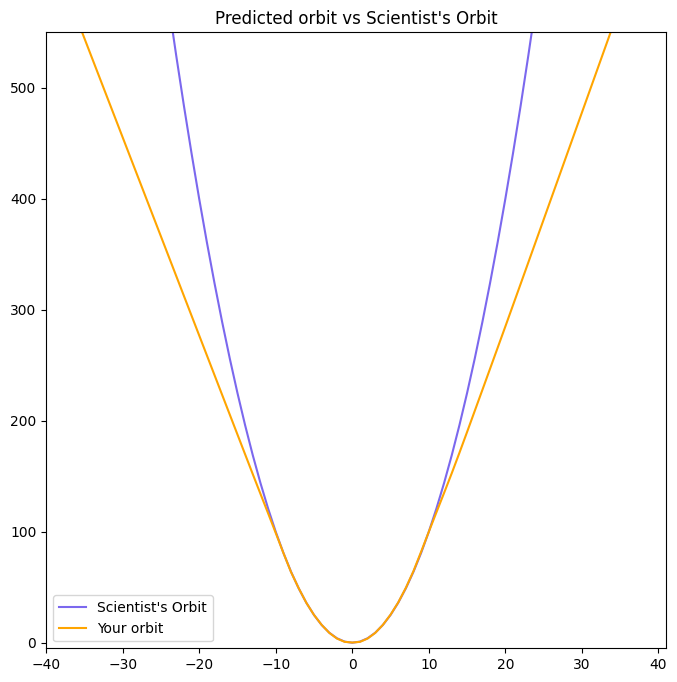

In [100]:
# Predict the eighty minute orbit
eighty_min_orbit = model.predict(np.arange(-40, 41))
# Plot the eighty minute orbit
plot_orbit(eighty_min_orbit)

**Prediction using early** **stopping**

changing the activation function to ELU didn't have a significant impact on the accuracy
-here we added 4 hidden layers 70 neurons each and the input layer 100 neurons


In [90]:
from tensorflow.keras.callbacks import EarlyStopping
# Instantiate a Sequential model
early_model = Sequential()

# # Add a Dense layer with 50 neurons and an input of 1 neuron
early_model.add(Dense(100, input_shape=(1, ), activation='elu'))
# Add three Dense layers with 60 neurons and relu activation
early_model.add(Dense(70, activation='elu'))
early_model.add(Dense(70, activation='elu'))
early_model.add(Dense(70, activation='elu'))
early_model.add(Dense(70, activation='elu'))

# End your model with a Dense layer and no activation
early_model.add(Dense(1))
lr=0.02
optimizer = tf.keras.optimizers.Adam(learning_rate= lr )
early_model.compile(optimizer=optimizer, loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
earlyHistory=early_model.fit(time_steps, y_positions, epochs=60, validation_split=0.3, callbacks=[early_stopping])
print("Final loss value:", early_model.evaluate(time_steps, y_positions))


Epoch 1/60
44/44 [==============================] - 2s 9ms/step - loss: 165.9484 - val_loss: 1868.0006
Epoch 2/60
44/44 [==============================] - 0s 4ms/step - loss: 9.1461 - val_loss: 864.0012
Epoch 3/60
44/44 [==============================] - 0s 5ms/step - loss: 0.5875 - val_loss: 570.8173
Epoch 4/60
44/44 [==============================] - 0s 4ms/step - loss: 0.1475 - val_loss: 634.5140
Epoch 5/60
44/44 [==============================] - 0s 4ms/step - loss: 0.1075 - val_loss: 438.8468
Epoch 6/60
44/44 [==============================] - 0s 4ms/step - loss: 0.0337 - val_loss: 380.4924
Epoch 7/60
44/44 [==============================] - 0s 4ms/step - loss: 0.8150 - val_loss: 427.4776
Epoch 8/60
44/44 [==============================] - 0s 4ms/step - loss: 7.1834 - val_loss: 1219.1129
Epoch 9/60
44/44 [==============================] - 0s 5ms/step - loss: 13.6648 - val_loss: 466.2092
Epoch 10/60
44/44 [==============================] - 0s 4ms/step - loss: 10.4737 - val_loss: 85

3/3 [==============================] - 0s 3ms/step


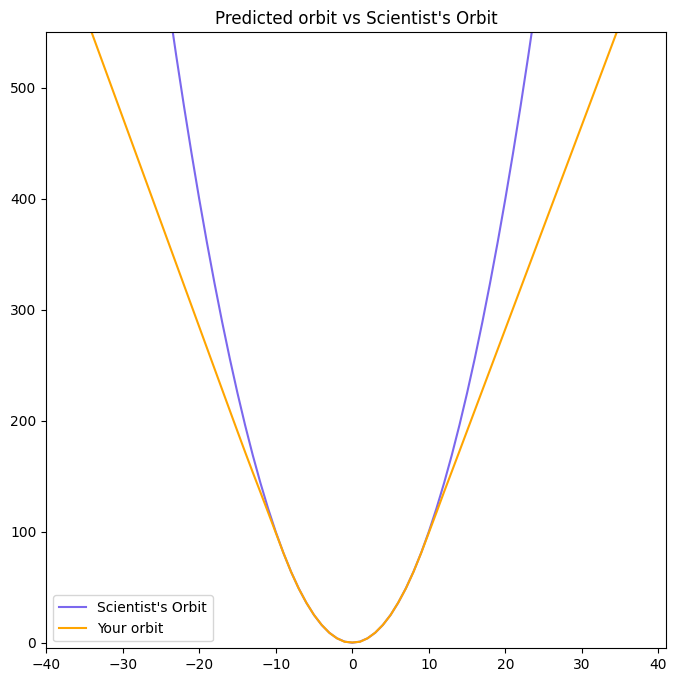

In [91]:
eighty_min_orbit = model.predict(np.arange(-40, 41))
plot_orbit(eighty_min_orbit)

Changing the activation function to ELU and using early stopping gave approximately the same accuracy without early stopping

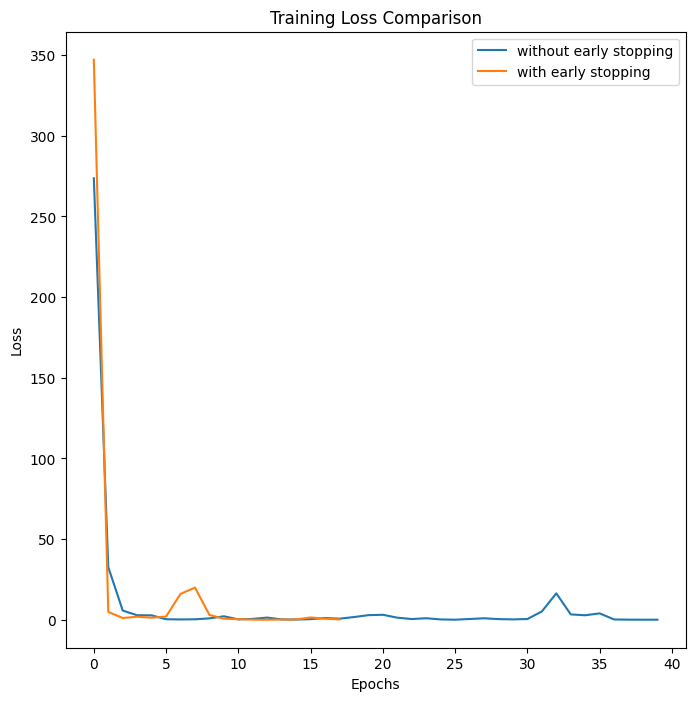

In [88]:
# comparaison of the accuracy in both cases: with and without early stopping
plt.plot(history.history['loss'], label='without early stopping')
plt.plot(earlyHistory.history['loss'], label='with early stopping')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.show()